In [16]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [17]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,Un micro servicio es una parte de la arquitect...,NaN
2,3,M,NaN,NaN,NaN,Mercados energeticos: Tras la liberación y des...,Los datos de series de tiempo son un conjunto ...,NaN,Los metodos de ensamble nos permiten mejorar e...,Los microservicios defininen una nueva metodol...,NaN
3,4,M,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...
4,5,M,NaN,NaN,NaN,"1. Actualmente, la empresa de mascotas Laika q...",Un conjunto de datos de una serie de tiempo co...,NaN,Los modelos de ensamble consisten en mezclar l...,Los microservicios son tanto un estilo de arqu...,NaN


In [18]:
# Eliminamos los valores perdidos del Dataframe
Ndata=data.dropna()

In [19]:
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 37
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID                                          18 non-null     int64  
 1   Genero                                      18 non-null     object 
 2   Carrera de pregrado                         18 non-null     object 
 3   Sector en el que trabaja                    18 non-null     object 
 4   Edad                                        18 non-null     float64
 5   E1 - Examples of Time Series Analysis       18 non-null     object 
 6   E4 - Panel Data                             18 non-null     object 
 7   E6 - Decison Trees                          18 non-null     object 
 8   E8 - Ensemble Trees Overview                18 non-null     object 
 9   E10 - REST-API                              18 non-null     object 
 10  E12 - Natural La

In [20]:
# cambiamos el Nombre de la columna Sector
Ndata = Ndata.rename(columns={'Sector en el que trabaja':'Sector'})
Ndata.columns

Index(['ID', 'Genero', 'Carrera de pregrado', 'Sector', 'Edad',
       'E1 - Examples of Time Series Analysis', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API',
       'E12 - Natural Language Processing Overview'],
      dtype='object')

In [21]:
z = Ndata.Genero

In [22]:
p = Ndata.Sector  

In [23]:
y = Ndata.Edad



In [24]:
#Creamos un Dataframe sin las columnas de ID y EDAD
x =Ndata.drop(['Edad','ID'] ,axis=1)

In [25]:
x

,Genero,Carrera de pregrado,Sector,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,M,Matemáticas,Estudio de mercados,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...
3,M,Estadistica,Financiero,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...
8,M,Ingeniería Electrónica,Consultoría de negocios y Tecnología,Pronóstico del tiempo: Dado el comportamiento ...,La diferencia entre series de tiempo y datos p...,Los tipos de árboles de decisión se basan en e...,Hay tres razones principales por las que los m...,Los microservicios son servicios desplegados i...,La Fiscalía General de la Nación implementó en...
12,M,Ingeniería Electrónica,Financiero,1. Contactos Call Center: El número de contact...,Diferencia: La diferencia entre datos panel y ...,Problemas de tipo regresión\n\nÁrboles de Tipo...,Los modelos de ensamble son una técnica de Mac...,Los microservicios son un tipo de arquitectura...,PhotoMath: Es una aplicación que utiliza la cá...
13,F,Ingeniería Industrial y economía,Fintech,Ejemplo 1: Cantidad de usuarios nuevos que se ...,La diferencia principal de los datos panel y l...,Los algoritmos arboles de decisión son métodos...,La técnica o método de ensamblaje es una estra...,Teniendo en cuenta la introducción al tema pub...,El procesamiento de lenguaje natural hace part...
15,M,Ingenieria Industrial,Financiero,1.\tPara anticipar el futuro de una empresa ma...,Una serie de tiempo corresponde a un conjunto ...,Los árboles de decisión son modelos predictivo...,Muchos problemas de machine learning pueden se...,Los términos RESTful API y Microservices van d...,Watson Annotator for Clinical Data extrae con...
17,M,Estadística,Data Scientist - Banca,Los análisis de las series de tiempo son útile...,Las series temporales son aquellas observacion...,Los árboles de decisión son hoy en día muy usa...,"En primera instancia, el ensamblado es el arte...",Los microservicios son APIs muy comunes hoy en...,"La aseguradora médica Aetna, de los Estados Un..."
18,M,Ingeniería de sistemas,Financiero,El análisis de series de tiempo es útil para i...,Las series de datos se caracteriza por enfocar...,Los algoritmos de aprendizaje basados en árbol...,"El principio de ""la sabiduría colectiva"" muest...",Los microservicios son un método distintivo de...,Es muy frecuente que las empresas aseguradoras...
23,F,Ingeniería Industrial,Operaciones,- Forecasting: El análisis de series de tiempo...,La diferencia fundamental consiste en el númer...,Los árboles de decisión o “Desision Trees” hac...,El ensamble de árboles no es otra cosa diferen...,Los Microservicios son una forma de estructura...,Hay variadas aplicaciones de uso del NPL pero ...
25,F,Ingeniería Industrial,Infraestructura deTransporte,•\tSerie del tráfico terrestre en las vías con...,La principal diferencia entre una serie tempor...,Los árboles de decisión son un tipo de modelos...,Los ensambles son una estrategia utilizada en ...,El uso de microservicio es una técnica empíric...,El Royal Bank of Scotland utiliza analítica de...


In [42]:
#Unificamos las columnas de Texto en una sola
T = Ndata[['Carrera de pregrado', 'E1 - Examples of Time Series Analysis', 'E4 - Panel Data','E6 - Decison Trees','E8 - Ensemble Trees Overview','E10 - REST-API','E12 - Natural Language Processing Overview']].apply(' '.join, axis=1)

## **Exercise 13.1**

Analyze the writing patterns of each student

In [89]:
T = pd.DataFrame(T,columns = {'texto'})
T['estudiante'] = T.index
T

,texto,estudiante
0,Matemáticas Dentro de las diferentes aplicacio...,0
3,Estadistica Las series de tiempo son una colec...,3
8,Ingeniería Electrónica Pronóstico del tiempo: ...,8
12,Ingeniería Electrónica 1. Contactos Call Cente...,12
13,Ingeniería Industrial y economía Ejemplo 1: Ca...,13
15,Ingenieria Industrial 1.\tPara anticipar el fu...,15
17,Estadística Los análisis de las series de tiem...,17
18,Ingeniería de sistemas El análisis de series d...,18
23,Ingeniería Industrial - Forecasting: El anális...,23
25,Ingeniería Industrial •\tSerie del tráfico ter...,25


In [90]:
import re


def limpiar_tokenizar(texto):
    
    
   
    nuevo_texto = texto.lower()
    
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
  
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
  
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
   
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    
    nuevo_texto = nuevo_texto.split(sep = ' ')
  
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)


In [91]:
T['texto_tokenizado'] = T['texto'].apply(lambda x: limpiar_tokenizar(x))
T[['texto', 'texto_tokenizado']].head()

,texto,texto_tokenizado
0,Matemáticas Dentro de las diferentes aplicacio...,"[matemáticas, dentro, de, las, diferentes, apl..."
3,Estadistica Las series de tiempo son una colec...,"[estadistica, las, series, de, tiempo, son, un..."
8,Ingeniería Electrónica Pronóstico del tiempo: ...,"[ingeniería, electrónica, pronóstico, del, tie..."
12,Ingeniería Electrónica 1. Contactos Call Cente...,"[ingeniería, electrónica, contactos, call, cen..."
13,Ingeniería Industrial y economía Ejemplo 1: Ca...,"[ingeniería, industrial, economía, ejemplo, ca..."


In [92]:
T_1 = T.explode(column='texto_tokenizado')
T_1 = T_1.drop(columns='texto')
T_1 = T_1.rename(columns={'texto_tokenizado':'token'})
T_1.head(3)

,estudiante,token
0,0,matemáticas
0,0,dentro
0,0,de


In [93]:
# Palabras totales utilizadas por cada estudiante
# ==============================================================================
print('--------------------------')
print('Palabras totales por estudiante')
print('--------------------------')
T_1.groupby(by='estudiante')['token'].count()

--------------------------
Palabras totales por estudiante
--------------------------


estudiante
0     1393
3     1430
8     2087
12    1002
13    1255
15    1909
17    1646
18    1645
23    1331
25    1662
26    1298
27    1559
28    1768
30    1283
31    1684
35    1026
36    1525
37    2026
Name: token, dtype: int64

In [94]:
# Palabras distintas utilizadas por cada estudiante
# ==============================================================================
print('----------------------------')
print('Palabras distintas por estudiante')
print('----------------------------')
T_1.groupby(by='estudiante')['token'].nunique()

----------------------------
Palabras distintas por estudiante
----------------------------


estudiante
0     500
3     565
8     797
12    425
13    464
15    731
17    607
18    625
23    522
25    629
26    547
27    624
28    621
30    465
31    635
35    440
36    626
37    761
Name: token, dtype: int64

In [95]:
# Longitud media de las respuestas de cada estudiante
# ==============================================================================
T_df = pd.DataFrame(T_1.groupby(by = ["estudiante"])["token"].count())
T_df.reset_index().groupby("estudiante")["token"].agg(['mean'])

,mean
estudiante,
0,1393
3,1430
8,2087
12,1002
13,1255
15,1909
17,1646
18,1645
23,1331


In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:

# Obtención de listado de stopwords del español
# ==============================================================================
stop_words_spanish = list(stopwords.words('spanish'))
print(stop_words_spanish[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [98]:
# Filtrado para excluir stopwords en ingles
# ==============================================================================
T_1 = T_1[~(T_1["token"].isin(stop_words))]

In [99]:
# Filtrado para excluir stopwords en español
# ==============================================================================
T_1 = T_1[~(T_1["token"].isin(stop_words_spanish))]

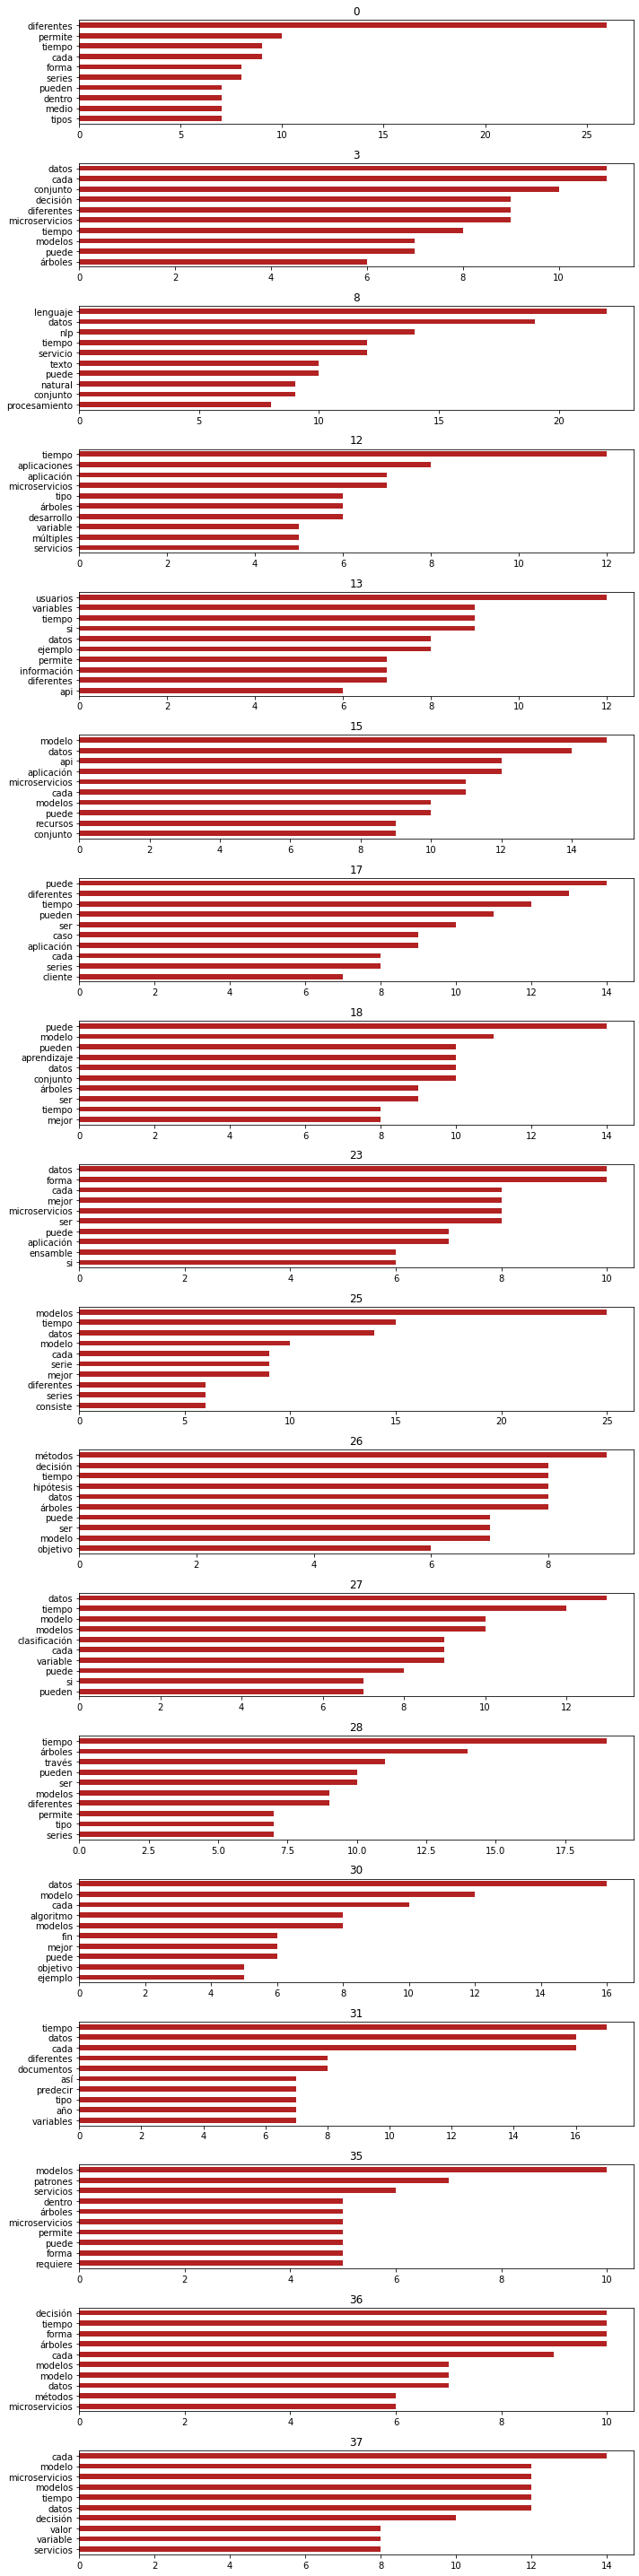

In [100]:
# Top 10 palabras por estudiante (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=18, ncols=1,figsize=(10, 40))
for i, estudiante in enumerate(T_1.estudiante.unique()):
    df_temp = T_1[T_1.estudiante == estudiante]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(estudiante)

fig.tight_layout()

In [101]:
# Top 5 palabras más utilizadas por cada estudiante
# ==============================================================================
T_1.groupby(['estudiante','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('estudiante') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))


estudiante           token  count
estudiante                                        
0          125            0      diferentes     26
           294            0         permite     10
           47             0            cada      9
           391            0          tiempo      9
           364            0          series      8
...                     ...             ...    ...
37         8868          37            cada     14
           9404          37          tiempo     12
           9194          37         modelos     12
           8959          37           datos     12
           9185          37  microservicios     12

[90 rows x 3 columns]

## **Exercise 13.2**

Create a classifier to predict the gender of each student

In [29]:
# use CountVectorizer to create document-term matrices from T
vect = CountVectorizer()
T_dtm = vect.fit_transform(T)

***Se observa que la palabra que mas se repite entre los estudiantes es Matematica con 2.423 palabras en todos los comentarios***

In [30]:
vect.vocabulary_

{'matemáticas': 2423,
 'dentro': 1110,
 'de': 1049,
 'las': 2283,
 'diferentes': 1241,
 'aplicaciones': 255,
 'que': 3208,
 'tiene': 3827,
 'series': 3571,
 'tiempo': 3823,
 'en': 1414,
 'la': 2276,
 'vida': 4058,
 'real': 3241,
 'se': 3504,
 'encuentran': 1423,
 'como': 710,
 'el': 1385,
 'precio': 3007,
 'cualquier': 996,
 'activo': 70,
 'lo': 2346,
 'largo': 2282,
 'estas': 1613,
 'son': 3663,
 'gran': 1935,
 'importancia': 2074,
 'dado': 1037,
 'reflejan': 3315,
 'por': 2974,
 'general': 1897,
 'mercados': 2484,
 'medio': 2453,
 'bolsas': 449,
 'valores': 4008,
 'new': 2659,
 'york': 4127,
 'tokio': 3840,
 'más': 2598,
 'localmente': 2351,
 'colombia': 677,
 'perú': 2916,
 'análisis': 244,
 'relacionado': 3339,
 'con': 779,
 'este': 1615,
 'tipo': 3831,
 'siempre': 3588,
 'ha': 1951,
 'tenido': 3796,
 'un': 3937,
 'interés': 2232,
 'económico': 1347,
 'los': 2361,
 'volúmenes': 4089,
 'dinero': 1252,
 'están': 1656,
 'presentes': 3052,
 'importantes': 2076,
 'del': 1091,
 'mundo': 

In [39]:
# registran 4.163 palabras
len(vect.vocabulary_)

4163

In [41]:
# rows are documents, columns are terms 
T_dtm.shape

(18, 4163)

In [45]:
# show vectorizer options
vect

CountVectorizer()

In [47]:
vect = CountVectorizer(lowercase=False)
T_dtm = vect.fit_transform(T)
T_dtm.shape

(18, 4490)

In [131]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 5))
T_dtm = vect.fit_transform(T)
T_dtm.shape

(18, 96555)

In [153]:
# Default CountVectorizer
vect = CountVectorizer()
T_dtm = vect.fit_transform(T)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
pd.Series(cross_val_score(nb, T_dtm, z, cv=6)).describe()

count    6.000000
mean     0.666667
std      0.000000
min      0.666667
25%      0.666667
50%      0.666667
75%      0.666667
max      0.666667
dtype: float64

In [150]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    T_dtm = vect.fit_transform(T)
    print('Features: ', T_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, T_dtm, z, cv=6)).describe())

In [164]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  20127
count    6.000000
mean     0.666667
std      0.210819
min      0.333333
25%      0.666667
50%      0.666667
75%      0.666667
max      1.000000
dtype: float64


**Se observa que el accuracy del modelo es de 0.6666 lo cual permite indicar que predice bien el genero de los estudiantes**

In [166]:
T_dtm = vect.fit_transform(T)
nb = MultinomialNB()
pd.Series(cross_val_score(nb, T_dtm, z, cv=6)).mean()

0.6666666666666666

## **Exercise 13.3**
Create a classifier to predict the industry in which each student works

In [180]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    T_dtm = vect.fit_transform(T)
    print('Features: ', T_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, T_dtm, p, cv=4)).describe())

In [181]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  20127
count    4.000000
mean     0.400000
std      0.141421
min      0.200000
25%      0.350000
50%      0.450000
75%      0.500000
max      0.500000
dtype: float64


C:\Users\meloj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


**Se observa que el accuracy del modelo es de 0.4 lo cual permite indicar que no predice bien el sector de trabajo de los estudiantes**

In [187]:
T_dtm = vect.fit_transform(T)
nb = MultinomialNB()
pd.Series(cross_val_score(nb, T_dtm, p, cv=4)).mean()

C:\Users\meloj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


0.4